<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#bcbcbc;
           font-size:300%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="font-size:30px;text-align:center"> Bone Marrow Changes in Lumbar Vertebrae MRI Classification</p>
</div>


<p style="text-align:center;"><img src="https://www.ajronline.org/cms/10.2214/AJR.11.7005/asset/images/12_11_7005_01.jpeg" width="200" height="350">
    
    
    
    
    
The objective of this project is to build a deep-learning model that can accurately classify MRI images as either Normal or Abnormal. The model will be trained on a dataset of labeled MRI images and will learn to identify specific patterns and features associated with Bone Marrow Changes in Lumbar Vertebrae. For Bone Marrow Changes in Lumbar Vertebrae classification, Bone Marrow Changes in Lumbar Vertebrae were divided into two main groups: Normal, and Abnormal, depending on the area that is involved. Each of these classes is subsequently divided into sub-groups. To introduce a transfer learning model that can improve the classification of Bone Marrow Changes in Lumbar Vertebrae.

In [1]:
# Import packages
#from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use ImageDataGenerator to rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# Define the general path
path = '/input/bonewithout-augment-70-20-10/boneWithOut_Augment/'


In [4]:
# Load the images
train_generator = train_datagen.flow_from_directory(directory=path +'train', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)


Found 712 images belonging to 2 classes.


In [5]:
valid_generator = valid_datagen.flow_from_directory(directory=path +'val', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)



Found 203 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(directory=path +'test',
                                                  target_size=(224, 224),
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)

Found 103 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf
tf.keras.backend.clear_session()
# Input shape images
input_shape = (224,224,3)
vgg19 = tf.keras.applications.vgg19.VGG19(
    weights='imagenet', 
    include_top=False,
    input_shape=input_shape
)

80134624/80134624 [==============================] - 4s 0us/step


In [8]:
# Freezing Layers

for layer in vgg19.layers[:-1]:
    layer.trainable=False

In [9]:
model_vgg19 = tf.keras.Sequential()
model_vgg19.add(vgg19)
model_vgg19.add(Flatten())
model_vgg19.add(Dense(2,activation = 'softmax'))

In [10]:
model_vgg19.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [11]:
model_vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 20,074,562
Trainable params: 50,178
Non-trainable params: 20,024,384
_________________________________________________________________


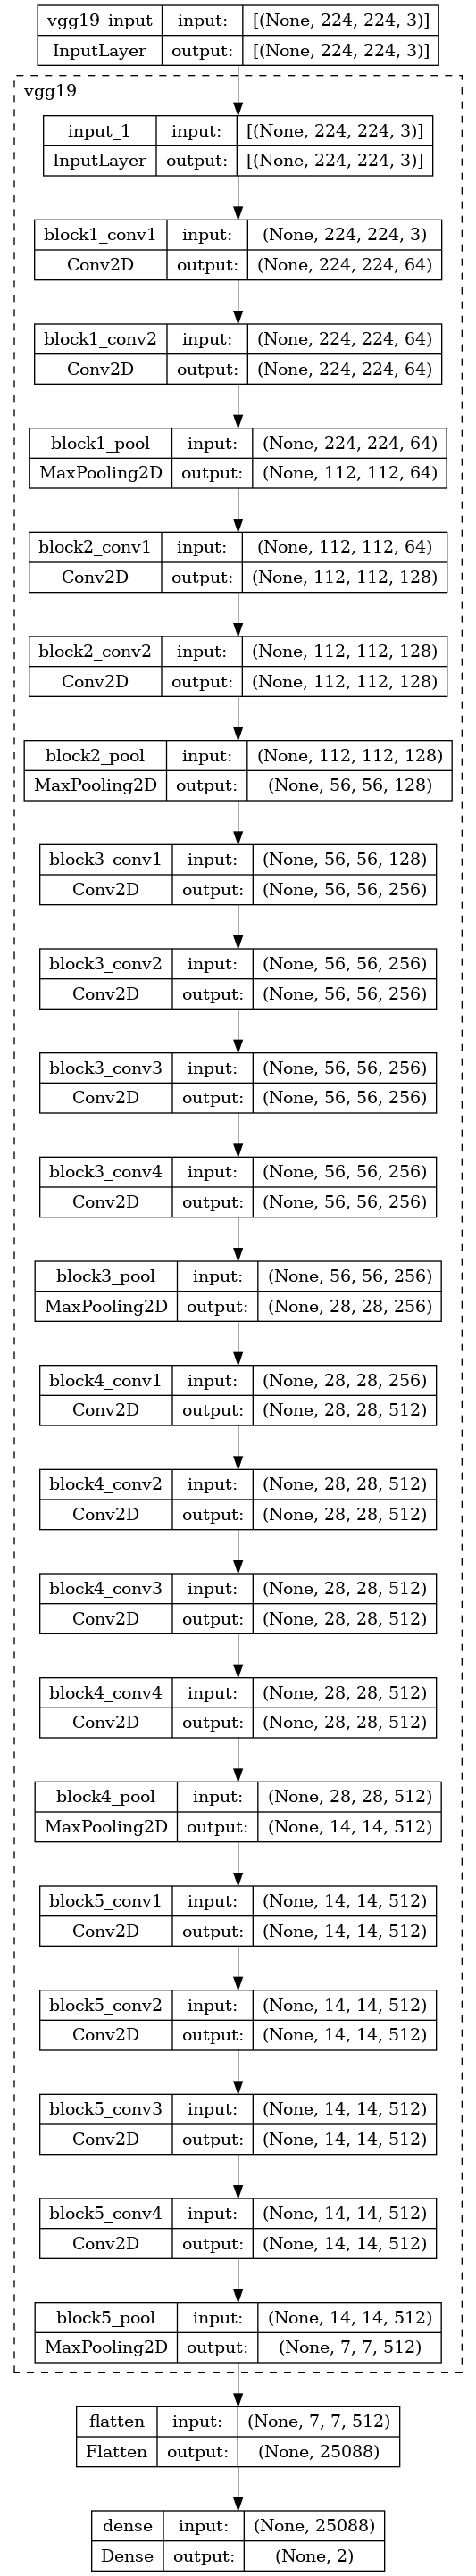

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model_vgg19,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

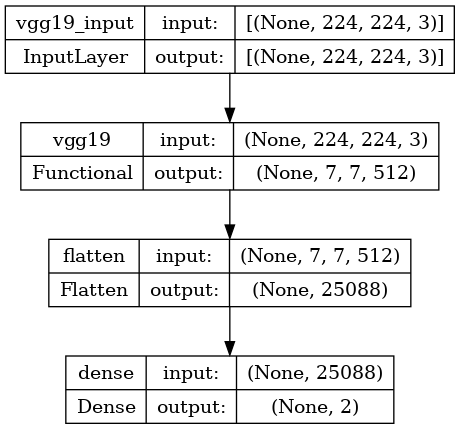

In [13]:
plot_model(model_vgg19,show_shapes=True, show_layer_names=True, rankdir='TB')

In [14]:
# Hyperparameters
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size


In [15]:
# Stop the training when there is no improvement after 10 epochs trainings.
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [16]:
# Train the model
history =model_vgg19.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,
          epochs=20, callbacks=early_stop)

Epoch 1/20
22/22 [==============================] - 274s 12s/step - loss: 1.2754 - accuracy: 0.5471 - val_loss: 1.0093 - val_accuracy: 0.5990
Epoch 2/20
22/22 [==============================] - 272s 12s/step - loss: 0.7007 - accuracy: 0.6691 - val_loss: 0.5722 - val_accuracy: 0.7344
Epoch 3/20
22/22 [==============================] - 271s 12s/step - loss: 0.4939 - accuracy: 0.7559 - val_loss: 0.7097 - val_accuracy: 0.6094
Epoch 4/20
22/22 [==============================] - 269s 12s/step - loss: 0.4923 - accuracy: 0.7485 - val_loss: 0.6076 - val_accuracy: 0.7188
Epoch 5/20
22/22 [==============================] - 271s 12s/step - loss: 0.3891 - accuracy: 0.8279 - val_loss: 0.5106 - val_accuracy: 0.7292
Epoch 6/20
22/22 [==============================] - 269s 12s/step - loss: 0.3588 - accuracy: 0.8691 - val_loss: 0.5482 - val_accuracy: 0.7292
Epoch 7/20
22/22 [==============================] - 277s 13s/step - loss: 0.2960 - accuracy: 0.8926 - val_loss: 0.4494 - val_accuracy: 0.7917
Epoch 

In [17]:
# Evaluate the model
model_vgg19.evaluate(valid_generator,steps=STEP_SIZE_VALID)

6/6 [==============================] - 61s 10s/step - loss: 0.3732 - accuracy: 0.8385


[0.3731794059276581, 0.8385416865348816]

In [18]:
# Save the model
model_vgg19.save("model_VGG19.h5")

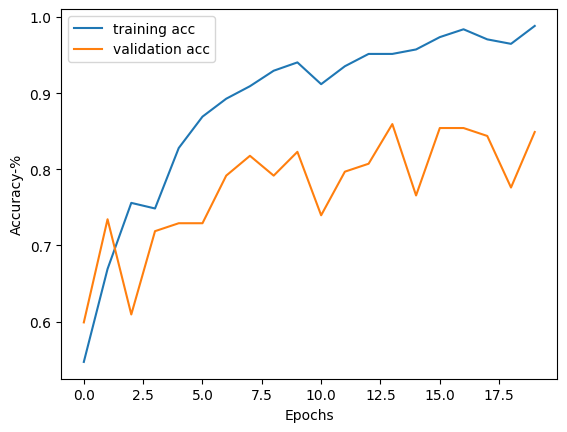

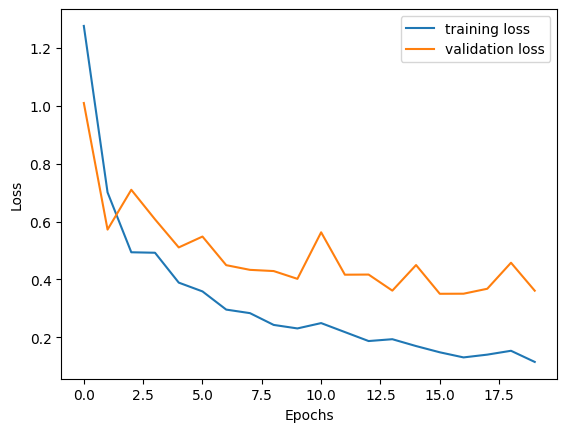

In [19]:
# plot learning curve
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='training acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-%')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_learning_curve(history)

In [20]:
#info about optimizers
model_vgg19.optimizer.get_config() 

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Predict Output
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model_vgg19.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


103/103 [==============================] - 34s 330ms/step


In [22]:
predictions[0:5]

['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal']

In [23]:
current_idx = 0
count_accurate= 0
Actual = []
for i in predictions:
    string = test_generator.filenames[current_idx]
    substr = '/'
    actual = string[:string.find(substr)]
    Actual.append(actual)
    pred = predictions[current_idx]
    if actual == pred: 
        count_accurate += 1
    current_idx +=1
acc = count_accurate/103
print(f"The accuracy on predicted the test images is {round(acc*100,2)}%.")

The accuracy on predicted the test images is 85.44%.


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Actual, predictions))

              precision    recall  f1-score   support

    Abnormal       0.86      0.88      0.87        56
      Normal       0.85      0.83      0.84        47

    accuracy                           0.85       103
   macro avg       0.85      0.85      0.85       103
weighted avg       0.85      0.85      0.85       103



In [25]:
print(confusion_matrix(Actual, predictions))

[[49  7]
 [ 8 39]]


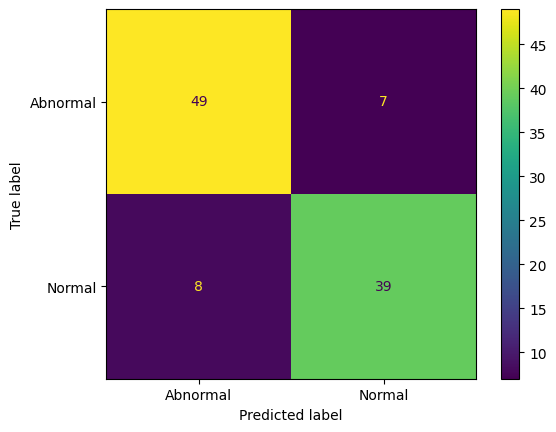

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Actual, predictions)

In [27]:
%who

Actual	 BatchNormalization	 ConfusionMatrixDisplay	 Conv2D	 Dense	 Dropout	 EarlyStopping	 Flatten	 ImageDataGenerator	 
MaxPool2D	 STEP_SIZE_TEST	 STEP_SIZE_TRAIN	 STEP_SIZE_VALID	 Sequential	 acc	 actual	 classification_report	 confusion_matrix	 
count_accurate	 current_idx	 early_stop	 history	 i	 input_shape	 labels	 layer	 model_vgg19	 
np	 path	 plot_learning_curve	 plot_model	 plt	 pred	 predicted_class_indices	 predictions	 preprocessing	 
string	 substr	 test_datagen	 test_generator	 tf	 train_datagen	 train_generator	 valid_datagen	 valid_generator	 
vgg19	 


In [28]:
acc

0.8543689320388349

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Assuming 'Actual' and 'predictions' are arrays or lists
conf_matrix = confusion_matrix(Actual, predictions)
# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
tn
# Calculate metrics
accuracy = accuracy_score(Actual, predictions)
precision = precision_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
recall = recall_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
specificity = tn / (tn + fp)
f1 = f1_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label

# Print the results
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"Specificity: {round(specificity, 4)}")
print(f"F1-score: {round(f1, 4)}")
print(f"TN: {round(tn)}")
print(f"FP: {round(fp)}")
print(f"FN: {round(fn)}")
print(f"TP: {round(tp)}")

Accuracy: 0.8544
Precision: 0.8596
Recall: 0.875
Specificity: 0.875
F1-score: 0.8673
TN: 49
FP: 7
FN: 8
TP: 39
